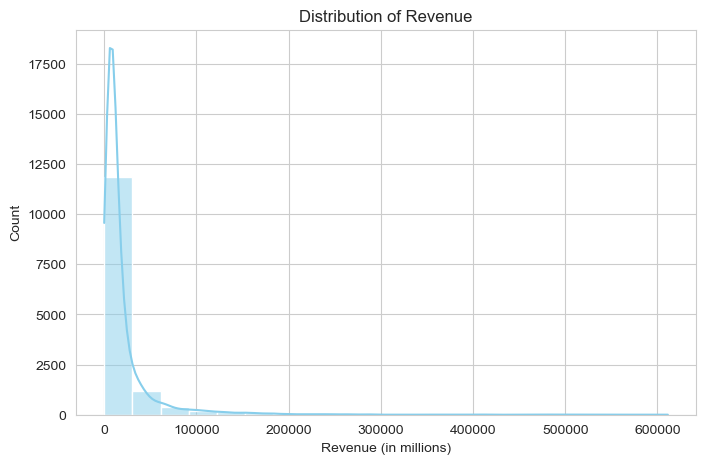

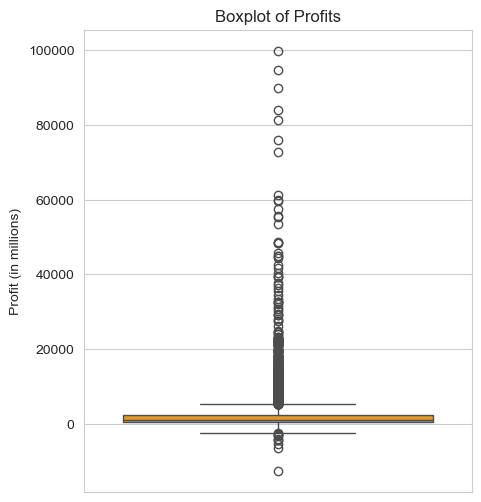

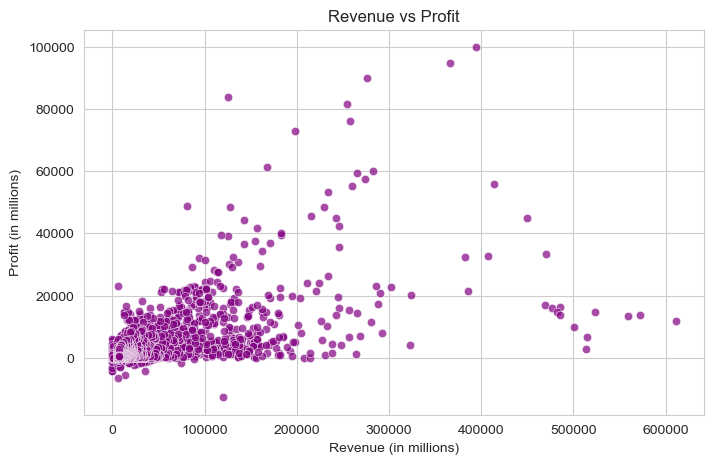

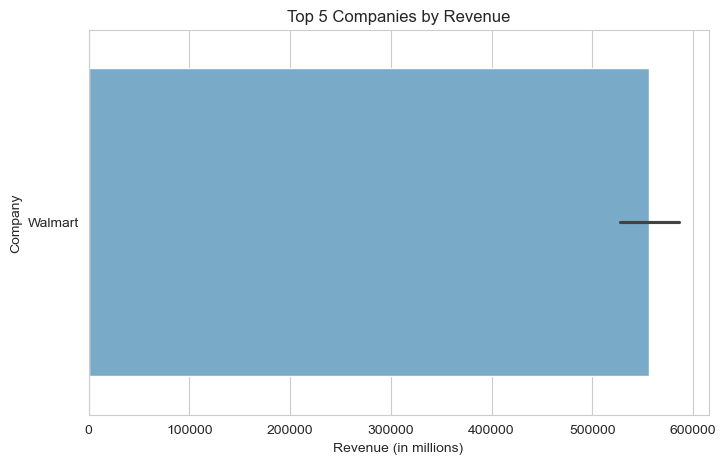

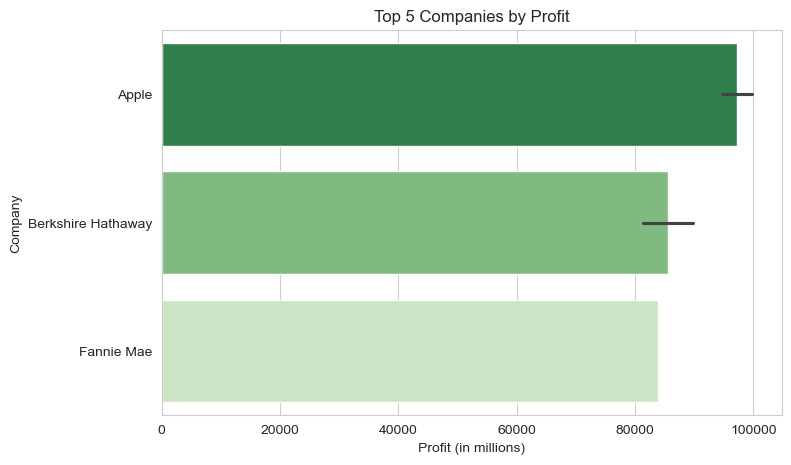


=== F500 Descriptive Summary ===
       Revenue (in millions)  Profit (in millions)
count           13940.000000           5497.000000
mean            20225.158016           2501.271621
std             35994.023496           5626.509092
min                48.290000         -12650.000000
25%              5806.225000            390.000000
50%              9587.500000            948.000000
75%             19109.000000           2319.000000
max            611289.000000          99803.000000

Average Revenue: 20225.158015781923
Average Profit: 2501.2716208841184
Correlation (Revenue vs Profit): 0.607453083804221

Top 5 Companies by Revenue:
        Company  Revenue (in millions)
13440  Walmart               611289.0
12940  Walmart               572754.0
12440  Walmart               559151.0
11940  Walmart               523964.0
11440  Walmart               514405.0

Top 5 Companies by Profit:
                   Company  Profit (in millions)
13443               Apple               99803.0
1

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# -------- Settings --------
sns.set_style("whitegrid")
plt.rcParams.update({"figure.dpi": 100})

# -------- Load data --------
f500 = pd.read_csv("F500.csv")

# Ensure numeric for key columns (if present)
for col in ["Revenue (in millions)", "Profit (in millions)", "Employees"]:
    if col in f500.columns:
        f500[col] = pd.to_numeric(f500[col], errors="coerce")

# -------- Calculations --------
avg_revenue = f500["Revenue (in millions)"].mean()
avg_profit = f500["Profit (in millions)"].mean()

top5_rev = f500.nlargest(5, "Revenue (in millions)")[["Company", "Revenue (in millions)"]]
top5_profit = f500.nlargest(5, "Profit (in millions)")[["Company", "Profit (in millions)"]]

corr_rev_profit = f500["Revenue (in millions)"].corr(f500["Profit (in millions)"])

# Skewness & Kurtosis
skew_rev = skew(f500["Revenue (in millions)"].dropna())
kurt_rev = kurtosis(f500["Revenue (in millions)"].dropna())
skew_profit = skew(f500["Profit (in millions)"].dropna())
kurt_profit = kurtosis(f500["Profit (in millions)"].dropna())

# Dispersion
revenue_range = f500["Revenue (in millions)"].max() - f500["Revenue (in millions)"].min()
profit_range = f500["Profit (in millions)"].max() - f500["Profit (in millions)"].min()

# -------- Plots --------
# Histogram revenue
plt.figure(figsize=(8,5))
sns.histplot(f500["Revenue (in millions)"].dropna(), bins=20, kde=True, color="skyblue")
plt.title("Distribution of Revenue")
plt.xlabel("Revenue (in millions)")
plt.ylabel("Count")
plt.show()

# Boxplot profit (vertical)
plt.figure(figsize=(5,6))
sns.boxplot(y=f500["Profit (in millions)"].dropna(), color="orange")
plt.title("Boxplot of Profits")
plt.ylabel("Profit (in millions)")
plt.show()

# Scatter revenue vs profit
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=f500,
    x="Revenue (in millions)",
    y="Profit (in millions)",
    color="purple",
    alpha=0.7
)
plt.title("Revenue vs Profit")
plt.xlabel("Revenue (in millions)")
plt.ylabel("Profit (in millions)")
plt.show()

# Bar plots for Top 5
# Top 5 Revenue
plt.figure(figsize=(8,5))
sns.barplot(data=top5_rev, x="Revenue (in millions)", y="Company",
            hue="Company", palette="Blues_r", legend=False)
plt.title("Top 5 Companies by Revenue")
plt.xlabel("Revenue (in millions)")
plt.ylabel("Company")
plt.show()

# Top 5 Profit
plt.figure(figsize=(8,5))
sns.barplot(data=top5_profit, x="Profit (in millions)", y="Company",
            hue="Company", palette="Greens_r", legend=False)
plt.title("Top 5 Companies by Profit")
plt.xlabel("Profit (in millions)")
plt.ylabel("Company")
plt.show()

# -------- Print Summary --------
print("\n=== F500 Descriptive Summary ===")
numeric_cols = [c for c in ["Revenue (in millions)", "Profit (in millions)", "Employees"] if c in f500.columns]
print(f500[numeric_cols].describe())

print("\nAverage Revenue:", avg_revenue)
print("Average Profit:", avg_profit)
print("Correlation (Revenue vs Profit):", corr_rev_profit)

print("\nTop 5 Companies by Revenue:\n", top5_rev)
print("\nTop 5 Companies by Profit:\n", top5_profit)

print("\nSkewness & Kurtosis:")
print("Revenue - Skewness:", skew_rev, " | Kurtosis:", kurt_rev)
print("Profit  - Skewness:", skew_profit, " | Kurtosis:", kurt_profit)

print("\nDispersion:")
print("Revenue Range:", revenue_range)
print("Profit Range:", profit_range)
